In [1]:
#Librerias
import pandas as pd
import yfinance as yf

In [2]:
# Definir el DF
ticker = 'ZW=F'
SRW = yf.Ticker(ticker)

SRW = SRW.history(period="max")

SRW

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-07-17 00:00:00-04:00,248.00,248.00,243.75,244.00,7233,0.0,0.0
2000-07-18 00:00:00-04:00,244.25,247.50,241.00,241.25,6523,0.0,0.0
2000-07-19 00:00:00-04:00,241.25,246.00,239.00,245.00,7136,0.0,0.0
2000-07-20 00:00:00-04:00,244.00,247.50,244.00,247.00,3792,0.0,0.0
2000-07-21 00:00:00-04:00,247.00,248.50,246.50,247.25,4380,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,648.00,670.25,645.75,670.25,33,0.0,0.0
2024-05-14 00:00:00-04:00,657.00,657.00,657.00,657.00,86543,0.0,0.0
2024-05-15 00:00:00-04:00,674.25,697.00,662.25,665.75,89540,0.0,0.0


<Axes: xlabel='Date'>

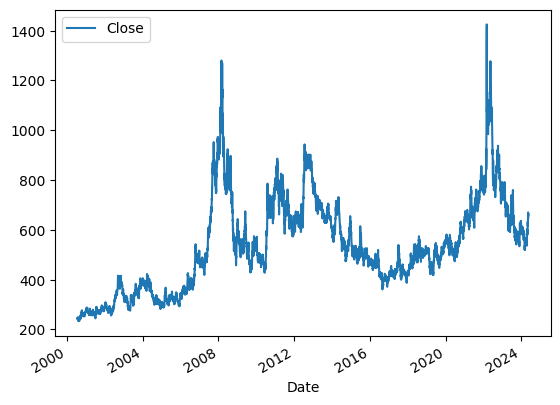

In [3]:
import matplotlib.pyplot as plt

SRW.plot.line(y="Close", use_index=True)

In [4]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import KFold

# Validación cruzada para seleccionar los mejores parámetros para el modelo ARIMA
def validacion_cruzada(df, parametros, n_splits=5):

  # Crear un objeto KFold para realizar la validación cruzada.
  kfold = KFold(n_splits=n_splits, shuffle=True)

  # Inicializar un diccionario para almacenar los resultados de la validación cruzada.
  resultados = {}

  # Iterar sobre cada partición de la validación cruzada.
  for train_index, test_index in kfold.split(df):

    # Crear un conjunto de datos de entrenamiento y prueba.
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]

  # Iterar sobre los parámetros a probar.
  for p, d, q in parametros:

    # Crea un modelo ARIMA con los parámetros actuales.
    modelo_arima = ARIMA(df_train['Close'], order=(p, d, q))
    resultado = modelo_arima.fit()

  # Calcula el error de predicción para el conjunto de datos de prueba.
  error = np.mean(df_test['Close'] - resultado.predict(start=len(df_train), end=len(df_train)+len(df_test)))

  # Almacena el resultado en el diccionario.
  resultados[(p, d, q)] = error

  # Encuentra los parámetros que proporcionan el menor error de predicción.
  mejores_parametros = min(resultados, key=lambda x: resultados[x])
  return mejores_parametros


In [5]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(SRW.Close.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.7537569411563303
p-value: 0.06518888170301783


In [6]:
from statsmodels.graphics.tsaplots import plot_acf

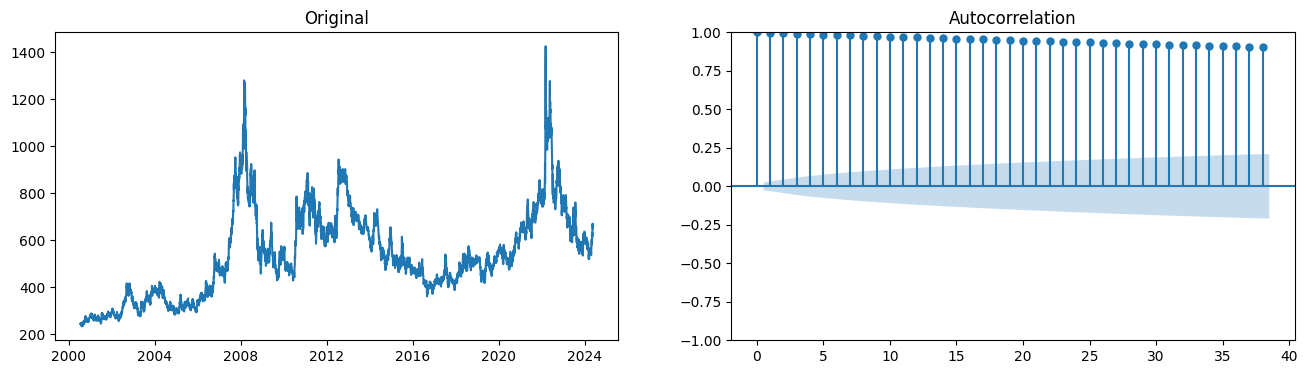

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(SRW.Close)
ax1.set_title("Original")

# Add ; at the end of the plot function so that the plot is not duplicated
plot_acf(SRW.Close, ax=ax2);

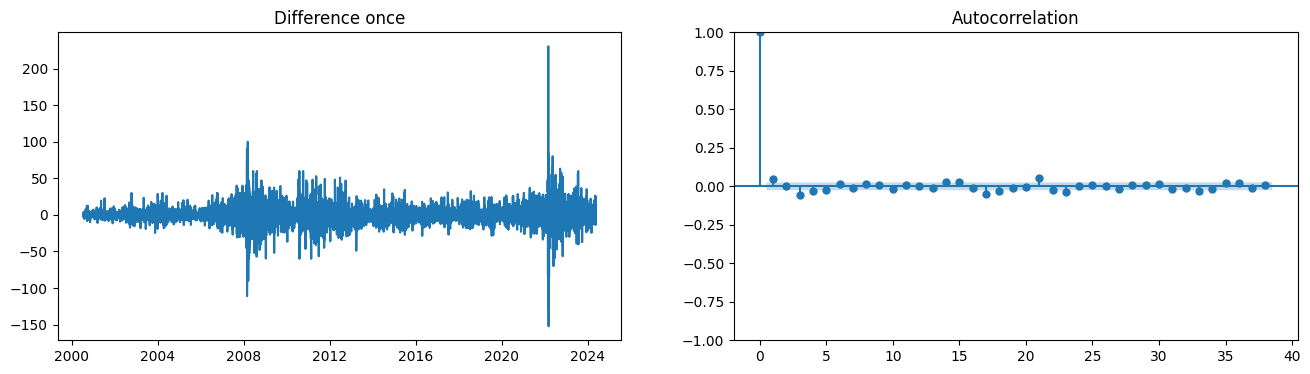

In [8]:
diff = SRW.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [9]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [11]:
from pmdarima.arima.utils import ndiffs
print(f'Number of differencing (d) needed for our model: {ndiffs(SRW.Close, test="adf")}')

Number of differencing (d) needed for our model: 1


In [12]:
# Find P candidates
from statsmodels.graphics.tsaplots import plot_pacf

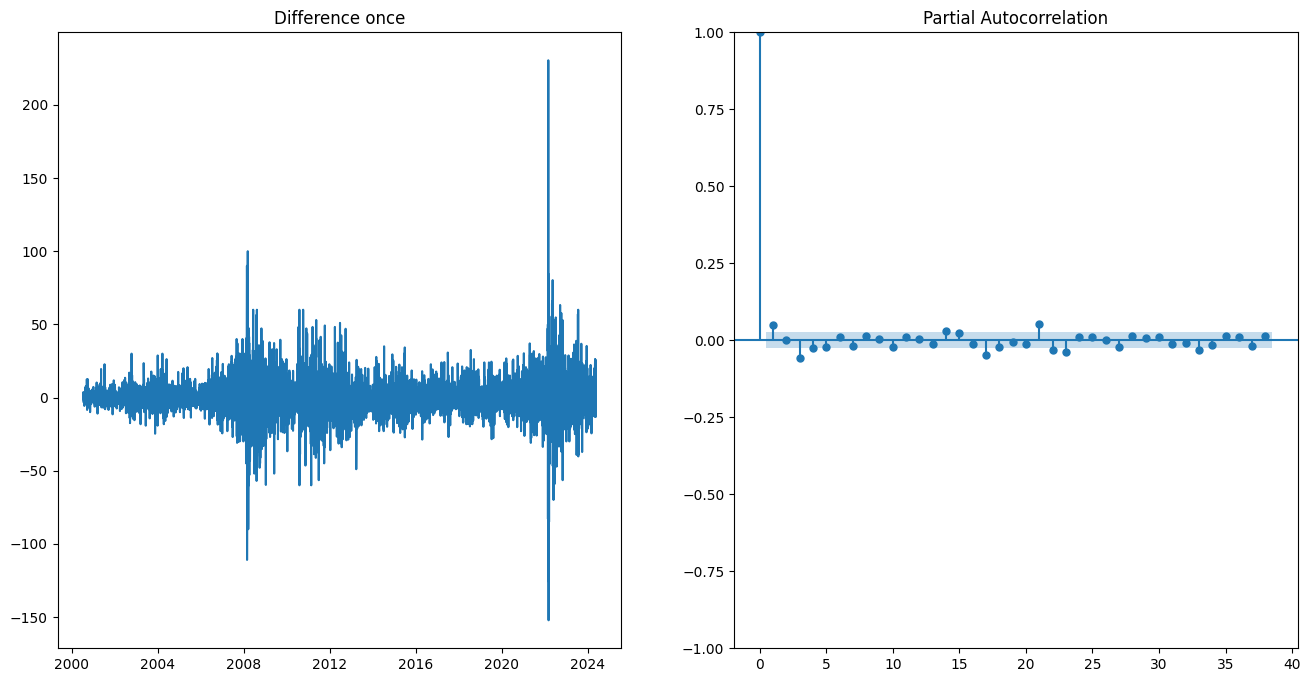

In [13]:
diff = SRW.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

P Candidates = [1, 2]

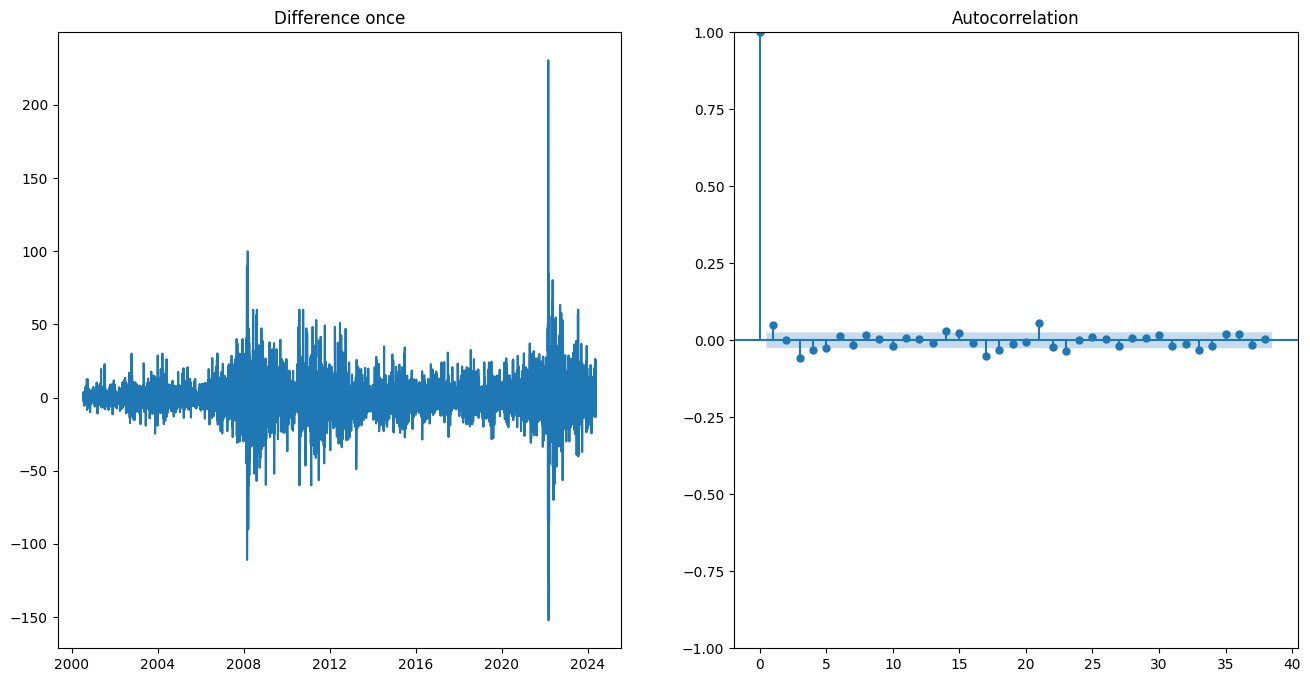

In [14]:
# q = 2
diff = SRW.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

q Candidates = [1, 2]

p, d, q

##  Buscar mejores parámetros

In [ ]:
# parametros = [(1, 1, 1), (14, 1, 14), (15, 1, 15), (21, 1, 21)]
parametros = [(21, 1, 4), (21, 1, 21)]

mejores_parametros = validacion_cruzada(SRW, parametros)

In [ ]:
print("el mejor orden de los parametros es:", mejores_parametros)


In [33]:
def precision(df, predicciones):
# Calcula el error absoluto medio.
  MAE = np.mean(np.abs(df['Close'] - predicciones))
  # Calcula el error cuadrático medio.
  MSE = np.mean((df['Close'] - predicciones)**2)
  # Calcula el error cuadrático medio ponderado.
  WMSE = np.mean((df['Close'] - predicciones)**2 / df['Close'])
  # Devuelve las métricas de precisión.
  return {
  'MAE': MAE,
  'MSE': MSE,
  'WMSE': WMSE
  }

##  ARIMA (2,1,2)

In [73]:
from statsmodels.tsa.arima.model import ARIMA

modelo_arima = ARIMA(SRW['Close'], order=(2,1,2)) # order=(3,1,2)
resultado = modelo_arima.fit()
# Predecir los próximos 10 años
prediccion = resultado.predict(start=len(SRW), end=len(SRW)+9, typ='levels')
# Mostrar las predicciones
print(prediccion)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5951    649.655862
5952    650.493002
5953    652.368205
5954    653.914750
5955    654.037628
5956    652.687791
5957    650.868754
5958    649.891699
5959    650.431189
5960    652.060948
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [74]:
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5951
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23918.408
Date:                Sat, 18 May 2024   AIC                          47846.817
Time:                        03:05:55   BIC                          47880.273
Sample:                             0   HQIC                         47858.440
                               - 5951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2590      0.006    205.194      0.000       1.247       1.271
ar.L2         -0.9728      0.007   -148.018      0.000      -0.986      -0.960
ma.L1         -1.2446      0.007   -170.872      0.0

In [75]:
resultado.resid.sum()

655.2612505561788

In [39]:
prediccion.values

array([649.65586231, 650.49300153, 652.36820468, 653.91474966,
       654.03762813, 652.68779059, 650.8687535 , 649.89169888,
       650.43118911, 652.06094849])

In [76]:
test = resultado.predict(start=1, end=len(SRW), typ='levels')
test.index = SRW.index[0:len(SRW)]
test

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Date
2000-07-17 00:00:00-04:00    244.000849
2000-07-18 00:00:00-04:00    241.197542
2000-07-19 00:00:00-04:00    245.080923
2000-07-20 00:00:00-04:00    247.086706
2000-07-21 00:00:00-04:00    247.231657
                                ...    
2024-05-13 00:00:00-04:00    671.746196
2024-05-14 00:00:00-04:00    656.618222
2024-05-15 00:00:00-04:00    664.242300
2024-05-16 00:00:00-04:00    661.525077
2024-05-17 00:00:00-04:00    649.655862
Name: predicted_mean, Length: 5951, dtype: float64

In [77]:
test.index = SRW.index[0:len(SRW)]

In [78]:
precision_metrics = precision(SRW, test)
print(precision_metrics)

{'MAE': 0.6860413069293441, 'MSE': 1.3797121496953066, 'WMSE': 0.001775636809182937}


In [ ]:
# Crear un nuevo DataFrame para almacenar las predicciones
predicciones_ARIMA = pd.DataFrame()
for i, valor in enumerate(prediccion):
# Calcular el año correspondiente
año = 2022 + i
# Agregar el año y la predicción a `predicciones_df`
predicciones_ARIMA = predicciones_ARIMA.append({'Año': año, 'PIB_Predicho': valor},
ignore_index=True)


ARIMA (3,1,2)

In [71]:
modelo_arima = ARIMA(SRW['Close'], order=(3,1,2)) # order=(3,1,2)
resultado = modelo_arima.fit()
# Predecir los próximos 10 años
prediccion = resultado.predict(start=len(SRW), end=len(SRW)+9, typ='levels')
# Mostrar las predicciones
print(prediccion)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5951    649.356615
5952    649.168743
5953    649.845000
5954    650.273778
5955    650.476451
5956    650.523769
5957    650.514523
5958    650.495925
5959    650.483942
5960    650.479081
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [72]:
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5951
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -23921.165
Date:                Sat, 18 May 2024   AIC                          47854.330
Time:                        03:05:33   BIC                          47894.477
Sample:                             0   HQIC                         47868.278
                               - 5951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5251      0.103      5.086      0.000       0.323       0.727
ar.L2         -0.0489      0.092     -0.531      0.595      -0.229       0.132
ar.L3         -0.0564      0.008     -7.503      0.0

In [24]:
resultado.resid.sum()

672.6609362249485

In [53]:
test = resultado.predict(start=1, end=len(SRW), typ='levels')
test.index = SRW.index[0:len(SRW)]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Date
2000-07-17 00:00:00-04:00    244.002184
2000-07-18 00:00:00-04:00    241.115452
2000-07-19 00:00:00-04:00    245.181595
2000-07-20 00:00:00-04:00    247.265508
2000-07-21 00:00:00-04:00    247.130674
                                ...    
2024-05-13 00:00:00-04:00    671.396725
2024-05-14 00:00:00-04:00    654.912353
2024-05-15 00:00:00-04:00    664.021191
2024-05-16 00:00:00-04:00    662.932106
2024-05-17 00:00:00-04:00    649.356615
Name: predicted_mean, Length: 5951, dtype: float64

In [54]:
precision_metrics = precision(SRW, test)
print(precision_metrics)

{'MAE': 0.7007792197792256, 'MSE': 1.2179565366949416, 'WMSE': 0.0016944739266072774}


##  ARIMA (3,1,1)

In [57]:
modelo_arima = ARIMA(SRW['Close'], order=(3,1,1))
resultado = modelo_arima.fit()
# Predecir los próximos 10 años
prediccion = resultado.predict(start=len(SRW), end=len(SRW)+9, typ='levels')
print(resultado.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5951
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -23921.177
Date:                Sat, 18 May 2024   AIC                          47852.354
Time:                        03:00:05   BIC                          47885.810
Sample:                             0   HQIC                         47863.977
                               - 5951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5032      0.072      6.950      0.000       0.361       0.645
ar.L2         -0.0196      0.007     -2.688      0.007      -0.034      -0.005
ar.L3         -0.0581      0.006     -9.572      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [58]:
resultado.resid.sum()

673.362316683744

In [59]:
test = resultado.predict(start=1, end=len(SRW), typ='levels')
test.index = SRW.index[0:len(SRW)]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [60]:
precision_metrics = precision(SRW, test)
print(precision_metrics)

{'MAE': 0.7007913701949823, 'MSE': 1.21635567279158, 'WMSE': 0.0016938905672843378}


##  ARIMA(3,1,3)

In [61]:
modelo_arima = ARIMA(SRW['Close'], order=(3,1,3))
resultado = modelo_arima.fit()
# Predecir los próximos 10 años
prediccion = resultado.predict(start=len(SRW), end=len(SRW)+9, typ='levels')
print(resultado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5951
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -23920.108
Date:                Sat, 18 May 2024   AIC                          47854.216
Time:                        03:00:27   BIC                          47901.054
Sample:                             0   HQIC                         47870.488
                               - 5951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1741      0.070      2.500      0.012       0.038       0.311
ar.L2          0.3645      0.088      4.151      0.000       0.192       0.537
ar.L3         -0.3257      0.073     -4.444      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [62]:
resultado.resid.sum()

668.5716225994779

In [63]:
test = resultado.predict(start=1, end=len(SRW), typ='levels')
test.index = SRW.index[0:len(SRW)]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [64]:
precision_metrics = precision(SRW, test)
print(precision_metrics)

{'MAE': 0.721981655600732, 'MSE': 1.2835314061412515, 'WMSE': 0.0017873741158472096}


##  ARIMA(1,1,1)

In [65]:
modelo_arima = ARIMA(SRW['Close'], order=(1,1,1))
resultado = modelo_arima.fit()
# Predecir los próximos 10 años
prediccion = resultado.predict(start=len(SRW), end=len(SRW)+9, typ='levels')
print(resultado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5951
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23933.918
Date:                Sat, 18 May 2024   AIC                          47873.835
Time:                        03:01:03   BIC                          47893.909
Sample:                             0   HQIC                         47880.809
                               - 5951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0495      0.096      0.514      0.607      -0.139       0.238
ma.L1         -0.0005      0.098     -0.006      0.996      -0.192       0.191
sigma2       182.5687      0.982    185.979      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [66]:
resultado.resid.sum()

629.9692455353178

In [67]:
test = resultado.predict(start=1, end=len(SRW), typ='levels')
test.index = SRW.index[0:len(SRW)]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [68]:
precision_metrics = precision(SRW, test)
print(precision_metrics)

{'MAE': 0.42894596867652435, 'MSE': 0.43824946482921523, 'WMSE': 0.0006227053004958435}


In [79]:
# Hacer predicciones para los próximos 10 días
forecast_steps = 10
forecast = resultado.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Crear un nuevo DataFrame para almacenar las predicciones
last_date = SRW.index[-1]
pred_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

predicciones_ARIMA = pd.DataFrame({'Fecha': pred_dates, 'Close_Predicho': forecast_mean.values})

# Mostrar el DataFrame con las predicciones
print(predicciones_ARIMA)

                      Fecha  Close_Predicho
0 2024-05-18 00:00:00-04:00      649.655862
1 2024-05-19 00:00:00-04:00      650.493002
2 2024-05-20 00:00:00-04:00      652.368205
3 2024-05-21 00:00:00-04:00      653.914750
4 2024-05-22 00:00:00-04:00      654.037628
5 2024-05-23 00:00:00-04:00      652.687791
6 2024-05-24 00:00:00-04:00      650.868754
7 2024-05-25 00:00:00-04:00      649.891699
8 2024-05-26 00:00:00-04:00      650.431189
9 2024-05-27 00:00:00-04:00      652.060948


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


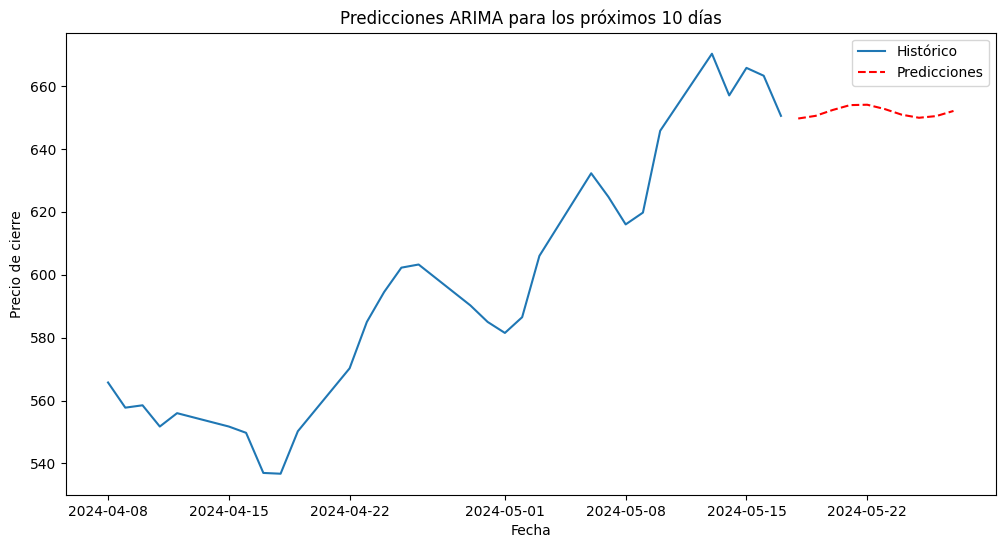

In [83]:
# Graficar los datos históricos y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(SRW.index[-30:], SRW['Close'][-30:], label='Histórico')
plt.plot(predicciones_ARIMA['Fecha'], predicciones_ARIMA['Close_Predicho'], label='Predicciones', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Predicciones ARIMA para los próximos 10 días')
plt.legend()
plt.show()